In [1]:
import pandas as pd 
import numpy as np

# 1. 데이터 분할
## 1.1 데이터 불러오기
trian.csv와 test.csv를 불러오세요.

- train은 transaction_year가 5 미만인 경우,
- test는 transaction_year가 5인 경우입니다. 알아두시면 됩니다.

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,30500,0,8,1.000000e+00,3.061617e-16


## 1.2 단위 수정
x와 y도 분리해두세요.
- train에만 일단 적용해주세요. 우린 아직 test데이터를 보지 못했습니다.

In [3]:
y=train[['price']]
y
X=train.drop(['price'],axis=1)
X

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,0,5,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),108.55,11,0,5,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),94.51,1,0,5,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,0,8,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,0,8,1.000000e+00,3.061617e-16
...,...,...,...,...,...,...,...,...
422159,강일동,강일리버파크2단지,84.74,6,4,8,-2.204364e-15,1.000000e+00
422160,강일동,고덕리엔파크2단지,59.83,7,4,6,1.000000e+00,4.892397e-16
422161,강일동,강일리버파크5단지,59.87,1,4,8,1.000000e+00,4.892397e-16
422162,강일동,강일리버파크4단지,84.83,9,4,8,5.879543e-15,-1.000000e+00


## 1.3 validation set 분할 - 첫번째
- 사이킷런의 train_test_split을 통해 train데이터를 8:2로 validation set을 만들어주세요.
- 즉 train중에서 train/val이 있고, test set이 따로 존재합니다.
- test set은 전처리 과정에서 절대 사용되지 않을 예정입니다

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y, test_size=0.2, random_state=42)

## 1.4 질문
- 이렇게 데이터를 나눌 경우 어떤 문제가 발생할 수 있을까요?
- 힌트) 현재 데이터는 관측된 시간이 존재합니다

답: train 데이터가 특정 시간에 몰릴 경우, 즉 각 특징들의 알맞은 비율만큼 푸풀되지 않는 경우 예측에 문제가 발생할 수 있다

## 1.5 validation set 분할 - 두번째
transaction_year == 4인 행을 validation으로 지정해서 분할하세요.

In [6]:
X_train

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
401216,천호동,동아하이빌,114.980,17,0,13,-1.000000e+00,-3.184701e-15
179939,홍은동,유원,54.540,4,3,29,-1.224647e-15,1.000000e+00
231270,방화동,청솔,59.040,6,2,21,1.000000e+00,-6.861117e-15
113810,쌍문동,한양2,35.100,5,4,28,1.102182e-15,-1.000000e+00
120620,중계동,동진,47.610,3,0,25,1.000000e+00,-6.861117e-15
...,...,...,...,...,...,...,...,...
259178,온수동,온수힐스테이트,59.960,4,3,6,-7.347881e-16,1.000000e+00
365838,대치동,은마,84.430,11,4,37,-7.347881e-16,1.000000e+00
131932,월계동,삼창,77.840,11,2,31,-1.000000e+00,-3.184701e-15
146867,중계동,중계무지개,39.820,4,3,25,5.389684e-15,-1.000000e+00


In [7]:
is_four = train['transaction_year'] == 4
validation=train[is_four]
validation_y=validation[['price']]
validation_X=validation.drop(['price'],axis=1)



not_four=train['transaction_year'] != 4
train=train[not_four]
train_y=train[['price']]
train_X=train.drop(['price'],axis=1)


## 1.5 캣부스트 인코딩 전에
일단 캣부스트 인코딩을 위해 다음을 설치하세요

In [10]:
! pip install category_encoders

  Using cached category_encoders-2.2.2-py2.py3-none-any.whl (80 kB)


In [11]:
from category_encoders.cat_boost import CatBoostEncoder
import category_encoders as ce

## 1.6 캣부스트 인코딩
- 방금까지 trainset을 분할했죠? 그 분할된 것을 캣부스트 인코딩의 인자로 받을 겁니다.
- train에서 분할된 train을 인코딩을 위한 학습으로 사용해서, 이를 validation_x에 적용합니다.
- 해당 결과를 head()를 통해 보여주세요

In [12]:
# Define train and target
#target = train[['grade']]
#train = train.drop('grade', axis = 1)
  
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(train_X, train_y)
val_cbe = cbe_encoder.transform(validation_X)

#https://www.geeksforgeeks.org/categorical-encoding-with-catboost-encoder/

In [13]:
val_cbe.head()

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
2451,89176.597368,86280.203194,107.91,14,4,9,-1.000000e+00,-1.836970e-16
2452,89176.597368,86280.203194,151.81,10,4,9,-1.000000e+00,-1.836970e-16
2453,89176.597368,86280.203194,94.51,2,4,9,-2.449294e-16,1.000000e+00
2454,89176.597368,86280.203194,94.28,12,4,9,-2.449294e-16,1.000000e+00
2455,103789.156533,107170.755379,145.96,13,4,13,-1.000000e+00,-1.836970e-16


In [14]:
train_cbe=cbe_encoder.transform(train_X)

## 2. 릿지 회귀 (Ridge Regression)
성능이 좋다고 알려진 부스팅모델 두개 하려다가, 그냥 릿지로 선회했습니다

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(train_cbe, train_y)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(train_cbe,train_y)))

print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(val_cbe,validation_y)))
#https://blog.naver.com/PostView.nhn?blogId=ssdyka&logNo=221231456916

훈련 세트의 정확도 : 0.86
테스트 세트의 정확도 : 0.82


## 2.1 상관계수 플랏
- 캣부스트 인코딩을 시행한 튜닝을 위한 trainset에 대해 상관계수플랏을 그리세요.
- 해석해주세요. 릿지 회귀가 잘 작동할까요?

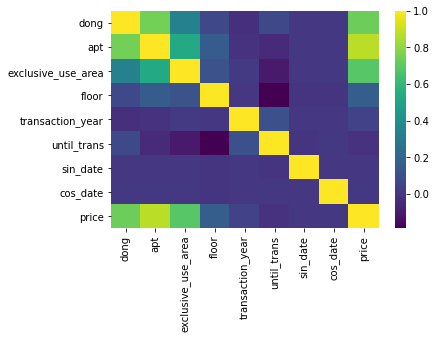

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date,price
0,89176.597368,86280.203194,95.88,6,0,5,-1.000000e+00,-1.836970e-16,70000
1,89176.597368,86280.203194,108.55,11,0,5,-2.449294e-16,1.000000e+00,100500
2,89176.597368,86280.203194,94.51,1,0,5,-2.449294e-16,1.000000e+00,65800
3,36772.527903,36772.527903,42.87,8,0,8,-1.000000e+00,-1.836970e-16,30500
4,36772.527903,36772.527903,39.67,15,0,8,1.000000e+00,3.061617e-16,30500
...,...,...,...,...,...,...,...,...,...
416312,41897.713781,43050.956617,84.74,9,3,7,5.879543e-15,-1.000000e+00,45500
416313,41897.713781,41799.433128,84.53,7,3,7,5.879543e-15,-1.000000e+00,44000
416314,41897.713781,38541.570789,84.83,6,3,7,5.879543e-15,-1.000000e+00,47500
416315,41897.713781,43050.956617,84.53,13,3,7,5.879543e-15,-1.000000e+00,45700


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.concat([train_cbe,train_y],axis=1)
corr = train.corr()
sns.heatmap(corr, cmap='viridis')

plt.show()
train

## 2.2 해석과 무관하게 일단 릿지 튜닝
- mse를 비교해서 튜닝을 진행하세요.
- 릿지의 튜닝파라미터 알파는 0.00001, 0.0001, 0.001, 0.01, 0.1로 설정합니다.
- 알파가 클수록 강한 페널티입니다.
- 튜닝결과를 시각화해주세요.

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
from sklearn.metrics import r2_score #https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

rr = Ridge(alpha=0.00001)       
rr.fit(train_cbe, train_y) 
pred_train_rr= rr.predict(train_cbe)
print(np.sqrt(mean_squared_error(train_y,pred_train_rr)))
print(r2_score(train_y, pred_train_rr))

pred_val_rr= rr.predict(val_cbe)
print(np.sqrt(mean_squared_error(validation_y,pred_val_rr))) 
print(r2_score(validation_y, pred_val_rr))

11355.138932325644
0.8648445823631539
15377.977659081647
0.816472384035736


In [19]:
rr = Ridge(alpha=0.0001)       
rr.fit(train_cbe, train_y) 
pred_train_rr= rr.predict(train_cbe)
print(np.sqrt(mean_squared_error(train_y,pred_train_rr)))
print(r2_score(train_y, pred_train_rr))

pred_val_rr= rr.predict(val_cbe)
print(np.sqrt(mean_squared_error(validation_y,pred_val_rr))) 
print(r2_score(validation_y, pred_val_rr))

11355.138932325644
0.8648445823631539
15377.977659258408
0.8164723840315169


In [20]:
rr = Ridge(alpha=0.001)       
rr.fit(train_cbe, train_y) 
pred_train_rr= rr.predict(train_cbe)
print(np.sqrt(mean_squared_error(train_y,pred_train_rr)))
print(r2_score(train_y, pred_train_rr))

pred_val_rr= rr.predict(val_cbe)
print(np.sqrt(mean_squared_error(validation_y,pred_val_rr))) 
print(r2_score(validation_y, pred_val_rr))

11355.138932325644
0.8648445823631539
15377.977661026003
0.8164723839893263


In [21]:
rr = Ridge(alpha=0.01)       
rr.fit(train_cbe, train_y) 
pred_train_rr= rr.predict(train_cbe)
print(np.sqrt(mean_squared_error(train_y,pred_train_rr)))
print(r2_score(train_y, pred_train_rr))

pred_val_rr= rr.predict(val_cbe)
print(np.sqrt(mean_squared_error(validation_y,pred_val_rr))) 
print(r2_score(validation_y, pred_val_rr))

11355.13893232564
0.864844582363154
15377.97767870193
0.8164723835674216


In [22]:
rr = Ridge(alpha=0.1)       
rr.fit(train_cbe, train_y) 
pred_train_rr= rr.predict(train_cbe)
print(np.sqrt(mean_squared_error(train_y,pred_train_rr)))
print(r2_score(train_y, pred_train_rr))

pred_val_rr= rr.predict(val_cbe)
print(np.sqrt(mean_squared_error(validation_y,pred_val_rr))) 
print(r2_score(validation_y, pred_val_rr))

11355.138932325655
0.8648445823631536
15377.977855461197
0.8164723793483744


In [32]:
#alpha=[0.00001,0.0001,0.001,0.01,0.1] #https://todayisbetterthanyesterday.tistory.com/14
#alpha = np.logspace(-5,-1,5)
#alpha
# lambda값 지정
# 0.001 <= lambda <= 10
#data = pd.DataFrame()
#acc_table = []

#for i, a in enumerate(alpha):
#    ridge = Ridge(alpha=a).fit(train_cbe, train_y)
#    data.append(pd.Series(np.hstack([ridge.coef_])))
#    pred_y = ridge.predict(vla_cbe) # full model
#    pred_y = cut_off(pred_y, 0.5)
#    cfmat = confusion_matrix(validation_y,pred_y)
#    acc_table.append((acc(cfmat)))
    
    
#df_ridge = pd.DataFrame(data,index = alpha).T
#acc_table_ridge = pd.DataFrame(acc_table, index = alpha).T

## 2.3 튜닝결과 시각화

2.4 해석
튜닝 결과에 대한 플랏을 보고 해석을 해주세요.

튜닝이 잘되었나요?
튜닝이 안되었다면 그 이유는 무엇인가요?

https://stats.stackexchange.com/questions/81395/relationship-between-ridge-regression-and-pca-regression

수식이 쉽진 않을텐데 그냥 슬쩍 보세요...ㅎㅎㅎ
https://online.stat.psu.edu/stat508/lesson/5/5.1
penn state자료는 맨 아래부분만 보면 됩니다

## 2.5 그냥 선형 모형으로!
- 그냥 linear regression을 튜닝을 위한 trainset에 적합시키고, validation set에 대한 rmse를 계산하세요.

- linear regression은 다른 튜닝 파라미터를 필요로하지 않습니다.
- ridge와의 validation rmse를 비교했을 때, 어떤 모형을 쓰는 것이 나을지 말해주세요

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
line_fitter = LinearRegression()
line_fitter.fit(train_cbe, train_y)
y_predicted = line_fitter.predict(val_cbe)
print('mean_squared_errors: {}'.format(np.sqrt(mean_squared_error(validation_y, y_predicted ))))

mean_squared_errors: 15377.97765906307


답: linear이 나음 rmse가 작은 것이 좋음  

## 3. LightGBM
강력하면서도 빠른 부스팅 모형인 LGBM에 대해 다룰 예정입니다.

In [26]:
!pip install lightgbm

In [27]:
#import sys

#!{sys.executable} -m pip install lightgbm

## 3.1 LightGBM 이해
모형에 대해 아주 기본적인 이해는 필요하겠죠? LGBM의 특징/장점/문제점을 적어주세요.

- 20-01 데마팀 클린업 3주차 혹은 또 다른 데마팀 클린업을 보셔도 괜찮습니다.
- 구글링해도 잘 나옵니다.

### 특징: 
LightGBM의 리프 중심 트리 분할은 트리의 균형을 맞추지 않고 최대 손실 값(Max data loss)을 가지는 리프 노트를 지속적으로 분할하면서 트리의 깊이가 깊어지고 "비대칭적인 트리"가 생성된다. 최대 손실값을 가지는 리프 노드를 반복할수록 결국은 균형 트리의 분할 방식보다 예측 오류 손실을 최소화 할 수 있다.

### 장점:
- 학습하는데 걸리는 시간이 적다.
- 메모리 사용량이 상대적으로 적은편이다.
- 카테고리형 피처들의 자동 변환과 최적 분할

### 단점: 
- 적은 데이터 세트의 적용을 할 경우 과적합 가능성이 크다.

## 3.2 LGBM 튜닝
LGBM의 튜닝파라미터는 많습니다.
- max_depth, learning_rate, lambda, min_child_samples 등 다양한데, 패키지에서는 learning rate만 튜닝하도록 하겠습니다.
- [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.99] 이렇게 튜닝해주세요.
- 부스팅에서는 일단 learning rate과 iteration의 trade off를 적절하게 고려해줘서 학습속도를 맞춰준다음, 세부적인 튜닝을 하는게 일반적입니다.
- 더하고 싶으면 해서 더 좋은 성능을 내셔도 됩니다! 보통 enumerate를 통해 파라미터를 묶어줘서 진행합니다.

In [30]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMRegressor,LGBMClassifier
# import itertools

In [39]:
train_ds=lgb.Dataset(train_cbe,label=train_y)
val_ds=lgb.Dataset(val_cbe,label=validation_y)
rate= [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.99]
for rate in rate:
    params={'learning_rate':rate}
    model=lgb.train(params,train_ds,1000,val_ds)
    y_pred=model.predict(val_cbe)
    print('mean_squared_errors: {}'.format(np.sqrt(mean_squared_error(validation_y, y_pred ))))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 312466, number of used features: 8
[LightGBM] [Info] Start training from score 46056.618349
mean_squared_errors: 10389.411606011838
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 312466, number of used features: 8
[LightGBM] [Info] Start training from score 46056.618349
mean_squared_errors: 9206.332029581423
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009270 seconds.
You can set `force_row_wise=true` to remove the overhe

## 4. test set
## 4.1 test set 불러오기
test set을 불러오고, X와 y를 분리하세요.

In [40]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [41]:
test_y=test[['price']]
test_X=test.drop(['price'],axis=1)
train_y=train[['price']]
train_X=train.drop(['price'],axis=1)

## 4.2 캣부스트 인코딩
- 전체 train set에 대해 캣부스트 인코딩을 시행해주세요.
- 인자에는 train_x/train_y/test_x가 들어갈겁니다.

In [42]:
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(train_X, train_y)
test_cbe = cbe_encoder.transform(test_X)
train_cbe=cbe_encoder.transform(train_X)

## 4.3 최적의 파라미터 적합
2와 3의 결과에서 최적의 파라미터(모델)을 전체 trainset에 대해 적합하세요.

In [43]:
line_fitter = LinearRegression()
line_fitter.fit(train_cbe, train_y)
y_predicted = line_fitter.predict(test_cbe)
print('mean_squared_errors: {}'.format(np.sqrt(mean_squared_error(test_y, y_predicted ))))

mean_squared_errors: 17721.88060515686


In [44]:
train_ds=lgb.Dataset(train_cbe,label=train_y)
test_ds=lgb.Dataset(test_cbe,label=test_y)
rate= [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.99]
for rate in rate:
    params={'learning_rate':rate}
    model=lgb.train(params,train_ds,1000,test_ds)
    y_pred=model.predict(test_cbe)
    print('mean_squared_errors: {}'.format(np.sqrt(mean_squared_error(test_y, y_pred ))))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 422164, number of used features: 8
[LightGBM] [Info] Start training from score 48041.092876
mean_squared_errors: 12731.13273779304
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 422164, number of used features: 8
[LightGBM] [Info] Start training from score 48041.092876
mean_squared_errors: 11485.588067798715
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043459 seconds.
You can set `force_col_wise=true` to remove the overhe

## 4.4 test set에 대해 평가
두 모델을 test set에 대해 평가해서 비교하세요.

In [45]:
#rmse가 LGBM learnigrate가 0.3일때 제일 작음